In [46]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
crowdsourced = pd.read_csv("drive/MyDrive/DM23/data/crowdsourced.csv")
groundtruth = pd.read_csv("drive/MyDrive/DM23/data/groundtruth.csv")

In [48]:
crowdsourced.shape

(22501, 10)

In [49]:
groundtruth.shape

(1032, 10)

In [50]:
groundtruth.head()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
0,26,"You know, I saw a movie - ""Crocodile Dundee.""",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,9,26,0.000000,0
1,80,We're consuming 50 percent of the world's coca...,Michael Dukakis,Governor,DEMOCRAT,1988-09-25.txt,8,80,-0.740979,1
2,129,That answer was about as clear as Boston harbor.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,9,129,0.000000,-1
3,131,Let me help the governor.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,5,131,0.212987,-1
4,172,We've run up more debt in the last eight years...,Michael Dukakis,Governor,DEMOCRAT,1988-09-25.txt,22,172,-0.268506,1


In [51]:
merged = crowdsourced.merge(groundtruth, how='outer')
merged.tail()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
23528,28958,He has promised a trillion dollars out of the ...,Al Gore,Vice President,DEMOCRAT,2000-10-17.txt,24,953,0.363438,1
23529,28965,(LAUGHTER) I -- there's an old high school deb...,George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,23,960,-0.679982,-1
23530,29011,"Well, can I answer that?",George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,5,1006,0.413020,-1
23531,29060,I look forward to the final weeks of this camp...,George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,10,1055,0.625957,-1
23532,29062,"For those of you for me, thanks for your help.",George W. Bush,Governor,REPUBLICAN,2000-10-17.txt,10,1057,0.844495,-1


In [52]:
merged.Length.max()

152

In [53]:
merged['Date Commenced'] = merged.File_id.apply(lambda x: x.split('.')[0])

In [54]:
merged.head()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict,Date Commenced
0,16,I think we've seen a deterioration of values.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,8,16,0.000000,-1,1988-09-25
1,17,I think for a while as a nation we condoned th...,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,16,17,-0.456018,-1,1988-09-25
2,18,"For a while, as I recall, it even seems to me ...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,29,18,-0.805547,-1,1988-09-25
3,19,"So we've seen a deterioration in values, and o...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,35,19,0.698942,-1,1988-09-25
4,20,"We got away, we got into this feeling that val...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,15,20,0.000000,-1,1988-09-25


In [55]:
merged.shape

(23533, 11)

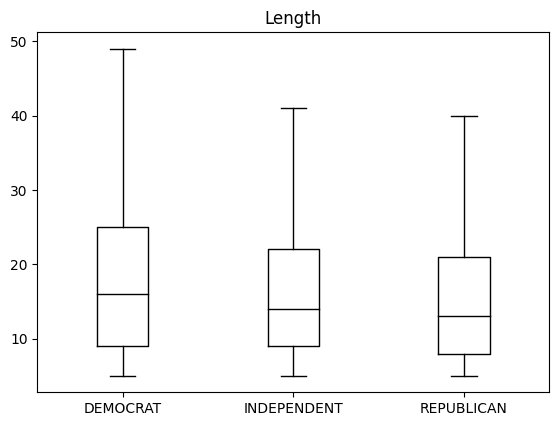

In [56]:
merged.boxplot("Length", by="Speaker_party", grid=False, showfliers=False, color="black")

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.suptitle("")
plt.xlabel("")
plt.show()

<Axes: xlabel='Verdict', ylabel='count'>

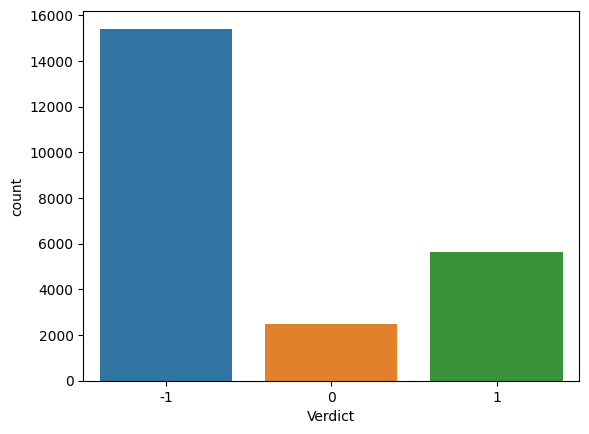

In [57]:
# (-1  Non-factual statement)
# (0 unimportant factual statement)
# (1 check-worthy factual statement)
sns.countplot(x ='Verdict', data = merged)

In [58]:
print('Null Values', merged.isnull().sum())

Null Values Sentence_id       0
Text              0
Speaker           0
Speaker_title     0
Speaker_party     0
File_id           0
Length            0
Line_number       0
Sentiment         3
Verdict           0
Date Commenced    0
dtype: int64


<Axes: xlabel='Verdict', ylabel='count'>

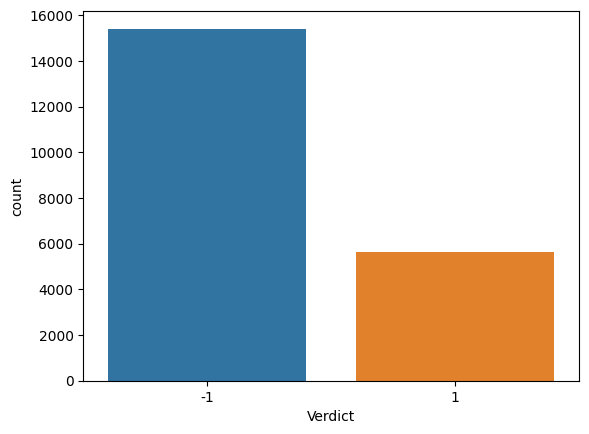

In [59]:
# Converting to binary, choosing only non-factual statement and check-worthy factual statement
# Removing unimportant factual statement

merged = merged.drop(merged[merged.Verdict == 0].index)
sns.countplot(x ='Verdict', data = merged)

In [60]:
merged['Verdict'].value_counts()

-1    15416
 1     5651
Name: Verdict, dtype: int64

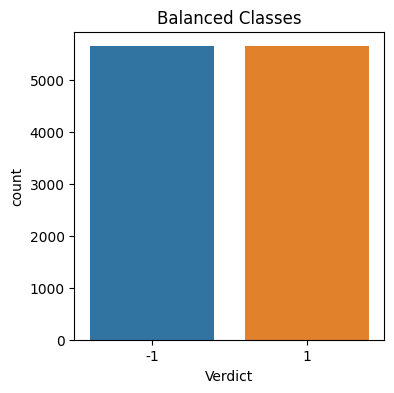

In [61]:
## Balancing Dataset, Undersampling
shuffled_df = merged.sample(frac = 1, random_state=4)

factual = shuffled_df.loc[shuffled_df['Verdict'] == 1]
# Selecting the actual number of non_factual resembling factual 
non_factual = shuffled_df.loc[shuffled_df['Verdict'] == -1].sample(n=5651, random_state=42)

# Concatenate both dataframes again
merged = pd.concat([factual, non_factual])
merged = merged.sample(frac=1,random_state=4)

# Plot of the dataset after undersampling
plt.figure(figsize=(4, 4))
sns.countplot(x = 'Verdict', data = merged)
plt.title('Balanced Classes')
plt.show()

In [62]:
# Preserving sentence_id
sentence_id = merged.Sentence_id

In [63]:
merged.head()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict,Date Commenced
11729,18148,Can I respond to that?,George W. Bush,President,REPUBLICAN,2004-09-30.txt,5,216,0.000000,-1,2004-09-30
22588,3436,"Number three, we've got to make sure that none...",Barack Obama,Senator,DEMOCRAT,2008-09-26.txt,24,43,-0.458236,-1,2008-09-26
11408,17687,But the figures show that about 8 million more...,Walter Mondale,Former Vice President,DEMOCRAT,1984-10-07.txt,19,636,-0.598957,1,1984-10-07
16164,24020,We never would have got there if we had gone f...,George Bush,President,REPUBLICAN,1992-10-11.txt,33,217,-0.612673,-1,1992-10-11
2378,3329,Just on Monday of this week I signed a tax bil...,Gerald R. Ford,President,REPUBLICAN,1976-10-06.txt,40,561,-0.636017,1,1976-10-06


In [64]:
merged['Speaker'] = merged['Speaker'].map(lambda x: x.lower() if isinstance(x,str) else x)
merged['Speaker_title'] = merged['Speaker_title'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [65]:
merged["Text"] += " // " + merged["Speaker"] + " // " + merged["Speaker_title"]

In [66]:
merged.head()

,Sentence_id,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict,Date Commenced
11729,18148,Can I respond to that? // george w. bush // pr...,george w. bush,president,REPUBLICAN,2004-09-30.txt,5,216,0.000000,-1,2004-09-30
22588,3436,"Number three, we've got to make sure that none...",barack obama,senator,DEMOCRAT,2008-09-26.txt,24,43,-0.458236,-1,2008-09-26
11408,17687,But the figures show that about 8 million more...,walter mondale,former vice president,DEMOCRAT,1984-10-07.txt,19,636,-0.598957,1,1984-10-07
16164,24020,We never would have got there if we had gone f...,george bush,president,REPUBLICAN,1992-10-11.txt,33,217,-0.612673,-1,1992-10-11
2378,3329,Just on Monday of this week I signed a tax bil...,gerald r. ford,president,REPUBLICAN,1976-10-06.txt,40,561,-0.636017,1,1976-10-06


In [67]:
verdicts = {-1: 0, 1: 1}
# Seperating the required features
data = {}
data['verdict'] = merged['Verdict'].map(verdicts)
data['claim'] = merged['Text']
# Creating new dataframe to work further
df = {'date_commenced': merged['Date Commenced'], 'claim': data['claim'], 'verdict': data['verdict']}
workable = pd.DataFrame(df, index=merged.index)

In [68]:
workable.head()

,date_commenced,claim,verdict
11729,2004-09-30,Can I respond to that? // george w. bush // pr...,0
22588,2008-09-26,"Number three, we've got to make sure that none...",0
11408,1984-10-07,But the figures show that about 8 million more...,1
16164,1992-10-11,We never would have got there if we had gone f...,0
2378,1976-10-06,Just on Monday of this week I signed a tax bil...,1


<Axes: xlabel='verdict', ylabel='count'>

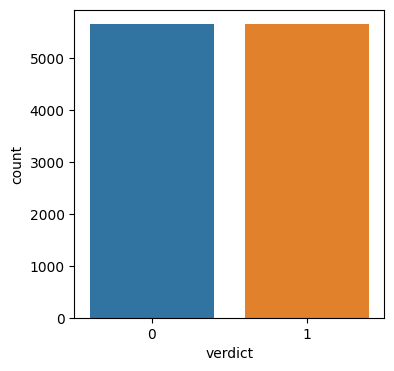

In [69]:
plt.figure(figsize=(4, 4))
sns.countplot(x ='verdict', data = workable)

In [70]:
workable.head()

,date_commenced,claim,verdict
11729,2004-09-30,Can I respond to that? // george w. bush // pr...,0
22588,2008-09-26,"Number three, we've got to make sure that none...",0
11408,1984-10-07,But the figures show that about 8 million more...,1
16164,1992-10-11,We never would have got there if we had gone f...,0
2378,1976-10-06,Just on Monday of this week I signed a tax bil...,1


In [71]:
!pip3 install nltk
!pip3 install scikit-plot
!pip3 install sklearn 0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [72]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
sw = set(stopwords.words('english'))

def punctuations(text):
    text = text.lower()
    punctuations = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    onlychars = re.sub('[^a-z]', ' ', punctuations)
    stripedspaces = re.sub('\s+', ' ', onlychars)
    return stripedspaces

def sw_remove_lemmatize(text):
    tokens = word_tokenize(text)
   
    lemmetizer = WordNetLemmatizer()
    final = []

    for item in tokens:
        if item not in sw:         
            final.append(lemmetizer.lemmatize(item))
        
    return ' '.join(final)

def preprocessing(df, target):
    df_processing = df.copy()
    df_processing[target] = df_processing.apply(lambda item: punctuations(item[target]), axis=1)  
    df_processing[target] = df_processing.apply(lambda item: sw_remove_lemmatize(item[target]), axis=1)        
    df_processing = df_processing.reset_index(drop = True)
    return df_processing

In [74]:
final_merged = preprocessing(workable, 'claim')

In [75]:
final_merged.head()

,date_commenced,claim,verdict
0,2004-09-30,respond george w bush president,0
1,2008-09-26,number three got make sure none money going pa...,0
2,1984-10-07,figure show million people poverty line year a...,1
3,1992-10-11,never would got gone nuclear freeze crowd neve...,0
4,1976-10-06,monday week signed tax bill included amendment...,1


In [76]:
final_merged.shape

(11302, 3)

In [77]:
# train = Mergeddata_P[(Mergeddata_P['date_commenced'] < '2008-01-01') & (Mergeddata_P['date_commenced'] > '1960-01-01')]
# test = Mergeddata_P[(Mergeddata_P['date_commenced'] < '2016-01-01') & (Mergeddata_P['date_commenced'] > '2012-01-01')]

In [78]:
# train.head()

In [79]:
# test.shape

In [80]:
# X_train, X_test, y_train, y_test = train['claim'], test['claim'], train['verdict'], test['verdict']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def ttsplit(df):
  X = data['claim']
  y = data['verdict']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=123, shuffle=True)
  return X_train, X_test, y_train, y_test

In [82]:
def tfvectorizer(df):
  X_train, X_test, y_train, y_test = ttsplit(df)
  ## Training transformation
  tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
  tfidf_train = tfidf.fit_transform(X_train)
  tfidf_train = tfidf_train.toarray()
  ## Test transformation
  tfidf_test = tfidf.transform(X_test).toarray()

  return tfidf_train, tfidf_test, y_train, y_test

In [83]:
def report(actual, predicted, model_name, accuracy, recall, precision, f1):
  print(model_name)
  print("="*20)
  print("Accuracy: ", accuracy)    
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1: ", f1)
  print("="*55)     
  print(classification_report(actual, predicted))

def cm(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.figure(figsize=(2,2))
  plt.show()

In [84]:
X_train, X_test, y_train, y_test = tfvectorizer(final_merged)

In [85]:
y_test

12857    0
21717    0
16671    0
9840     1
6081     1
        ..
17207    1
9627     0
3708     0
19730    0
13467    0
Name: Verdict, Length: 2261, dtype: int64

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, svm
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt

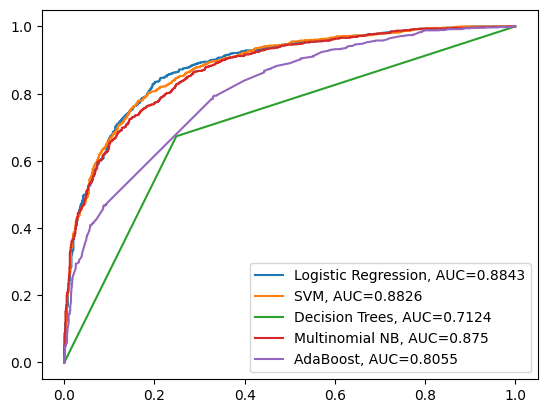

In [87]:
# Setting up the plotting area
plt.figure(0).clf()

lr = LogisticRegression()        
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_probes = lr.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall = recall_score(y_test, lr_predict) 
lr_f1 = f1_score(y_test, lr_predict) 
lr_precision = precision_score(y_test, lr_predict) 

fpr, tpr, _ = metrics.roc_curve(y_test, lr_probes)
auc = round(metrics.roc_auc_score(y_test, lr_probes), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

################################################################################

svmachines = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
svmachines.fit(X_train, y_train)
svm_predict = svmachines.predict(X_test)
svm_probes = svmachines.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, svm_probes)
auc = round(metrics.roc_auc_score(y_test, svm_probes), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

svm_accuracy = accuracy_score(y_test, svm_predict)
svm_recall = recall_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict) 
svm_precision = precision_score(y_test, svm_predict) 

################################################################################


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict  = dt.predict(X_test)
dt_probes = dt.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, dt_probes)
auc = round(metrics.roc_auc_score(y_test, dt_probes), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

dt_accuracy = accuracy_score(y_test, dt_predict)
dt_recall = recall_score(y_test, dt_predict)
dt_f1 = f1_score(y_test, dt_predict) 
dt_precision = precision_score(y_test, dt_predict) 

################################################################################

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predict = mnb.predict(X_test)
mnb_probes = mnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, mnb_probes)
auc = round(metrics.roc_auc_score(y_test, mnb_probes), 4)
plt.plot(fpr,tpr,label="Multinomial NB, AUC="+str(auc))

mnb_accuracy = accuracy_score(y_test, mnb_predict)
mnb_recall = recall_score(y_test, mnb_predict)
mnb_f1 = f1_score(y_test, mnb_predict) 
mnb_precision = precision_score(y_test, mnb_predict) 

################################################################################

adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaboost.fit(X_train, y_train)
adaboost_predict = adaboost.predict(X_test)
adaboost_probes = adaboost.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, adaboost_probes)
auc = round(metrics.roc_auc_score(y_test, adaboost_probes), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))

adaboost_accuracy = accuracy_score(y_test, adaboost_predict)
adaboost_recall = recall_score(y_test, adaboost_predict)
adaboost_f1 = f1_score(y_test, adaboost_predict) 
adaboost_precision = precision_score(y_test, adaboost_predict) 

plt.legend()

In [88]:
report(y_test, lr_predict, "Logistic Regression", lr_accuracy, lr_recall, lr_precision, lr_f1)
print("#"*55)
report(y_test, svm_predict, "Support Vector Machines", svm_accuracy, svm_recall, svm_precision, svm_f1)
print("#"*55)
report(y_test, dt_predict, "Decision Trees", dt_accuracy, dt_recall, dt_precision, dt_f1)
print("#"*55)
report(y_test, mnb_predict, "MultinomialNB", mnb_accuracy, mnb_recall, mnb_precision, mnb_f1)
print("#"*55)
report(y_test, adaboost_predict, "AdaBoost", adaboost_accuracy, adaboost_recall, adaboost_precision, adaboost_f1)

Logistic Regression
Accuracy:  0.810703228659885
Recall:  0.8134991119005328
Precision:  0.8077601410934744
F1:  0.8106194690265486
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1135
           1       0.81      0.81      0.81      1126

    accuracy                           0.81      2261
   macro avg       0.81      0.81      0.81      2261
weighted avg       0.81      0.81      0.81      2261

#######################################################
Support Vector Machines
Accuracy:  0.8058381247235736
Recall:  0.8072824156305506
Precision:  0.8037135278514589
F1:  0.8054940186087727
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1135
           1       0.80      0.81      0.81      1126

    accuracy                           0.81      2261
   macro avg       0.81      0.81      0.81      2261
weighted avg       0.81      0.81      0.81      2261

#####################

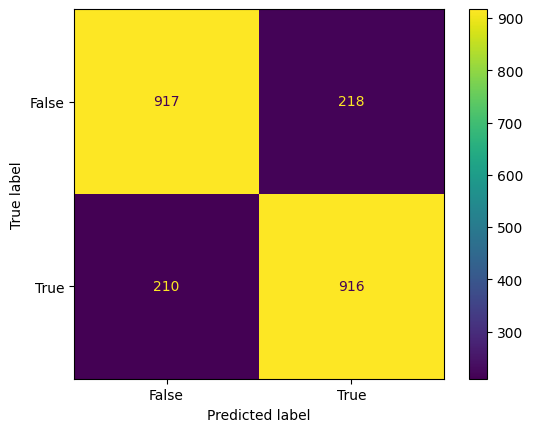

<Figure size 200x200 with 0 Axes>

In [89]:
## Confusion Matrix: Logistic Regression
cm(y_test, lr_predict)

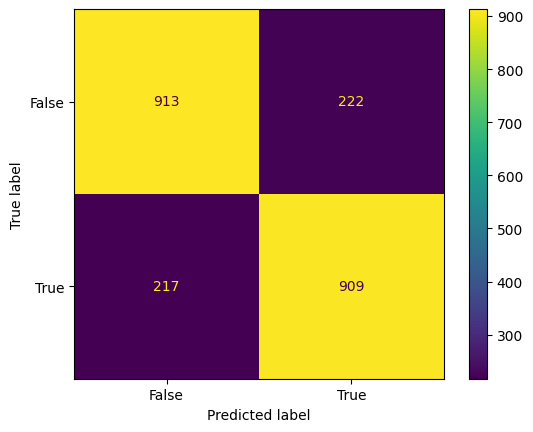

<Figure size 200x200 with 0 Axes>

In [90]:
## Confusion Matrix: SVM
cm(y_test, svm_predict)

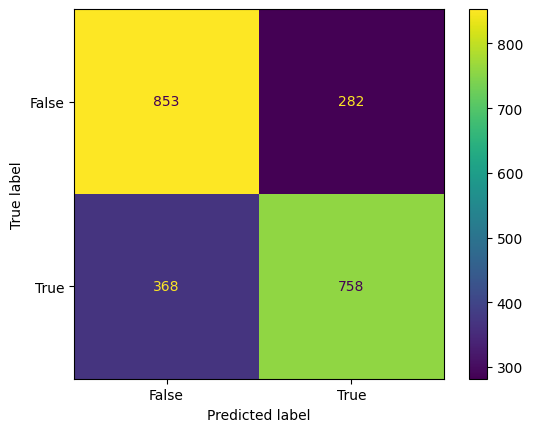

<Figure size 200x200 with 0 Axes>

In [91]:
## Confusion Matrix: Decision Trees
cm(y_test, dt_predict)

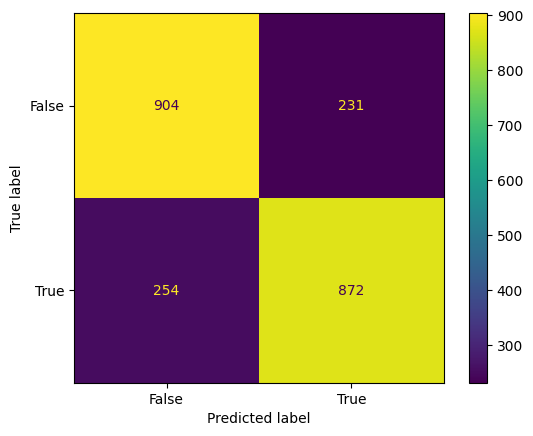

<Figure size 200x200 with 0 Axes>

In [92]:
## Confusion Matrix: MultinomialNB
cm(y_test, mnb_predict)